# Assignment 1 Task 2

### Jeremy Trane - 18357611

In this section of the assignment, the data obtained from task 1 will be imported, filtered, and utilised to observe different features of each dataset, and will be used as comparison for one against the other.

List of items which can be obtained from the metadata



The first step is to import all the packages which will be utilised to modify and plot the data approriately 

In [1]:
# Importing all packages used for analysing the data
import re
import json
import math
import tabulate
import itertools
import statistics
import matplotlib
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image
from datetime import datetime
from collections import Counter
from dateutil.parser import parse
from matplotlib.image import imread
from IPython.display import Image, HTML, display

%matplotlib inline

The first step seen below, loads the data obtained from the first tasks into the variables 'movies_of_2000_metadata', 'movies_of_2022_metadata', 'movies_of_2000' and 'movies_of_2022'.

In [2]:
# Loading up the data obtained from task 1 of the assignment
with open('movies_of_2000_metadata.json') as f:
    movies_of_2000_metadata = json.load(f)
    f.close()
with open('movies_of_2022_metadata.json') as f:
    movies_of_2022_metadata = json.load(f)
    f.close()

In [3]:
# Obtaining the list of movies for each year from Task 1
movies_of_2000 = []
with open('movies_of_2000.txt', 'r') as file:
    for line in file:
        movies_of_2000.append(line.strip())
file.close()

movies_of_2022 = []
with open('movies_of_2022.txt', 'r') as file:
    for line in file:
        movies_of_2022.append(line.strip())
file.close()

Now that the data has been loaded in, two def as seen below are used. The first one is used to obtain a certain stat which is available in the data, the second one is used to display information in a near and tidy table.

In [4]:
# A function which returns a list of a given stat
def compute_stat(metadata, stat, movies):
    return_stat = []
    if not isinstance(movies, str):
        for movie in movies:
            return_stat.append(metadata[movie][stat])
        return return_stat
    else:
        return_stat.append(metadata[movies][stat])
        return return_stat

In [5]:
# A function which displays data in a clear manner
def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td><h4>%s</h4></td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

In [6]:
#A function which displays a url image given to it
def display_poster(url):
    # Open the image from the URL as a binary file
    with urllib.request.urlopen(url) as url_file:
        # Open the binary file as a PIL image object
        image_pil = Image.open(url_file)

    # Convert the PIL image object to a NumPy array
    image_np = np.array(image_pil)

    # Display the image
    import matplotlib.pyplot as plt
    plt.imshow(image_np)
    plt.axis('off')
    plt.show()


As a quick visualisation a timeline is created to see the release date of all the movies.

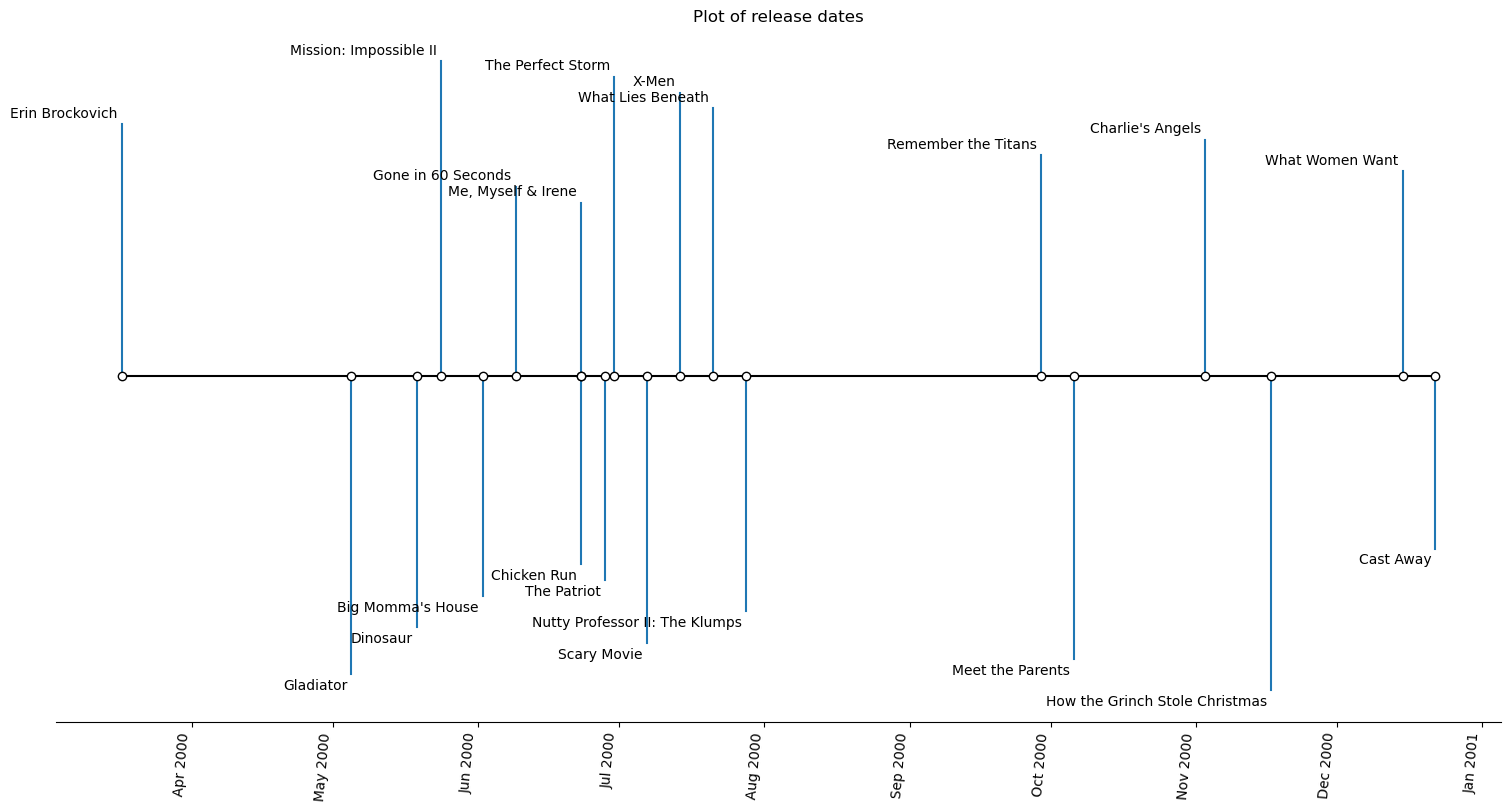

In [7]:
# Obtaining all the release dates for each movie
movie_release_dates = compute_stat(movies_of_2000_metadata, "Released", movies_of_2000)

# Parsing the movie dates
dates = []
for d in movie_release_dates:
    dates.append(parse(d))
    
# Choose some nice levels for the height of the movie labels
levels = np.tile([-20, 20, -19, 19, -18, 18, -17, 17, -16, 16, -15, 15, -14, 14, -13, 13, -12, 12, -11, 11],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 8), constrained_layout=True)
ax.set(title="Plot of release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                        basefmt="k-",
                                         use_line_collection=False)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, movies_of_2000, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 1 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=85, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

plt.show()

It is interesting to note that no movie which was in the top grossing of 2000 was released in the first two and a half months of the year. The first one being Erin Brockovich, release on the 17th of March. The timeline for the top gorssing movies of 2022 will be observed to see if a similar trend can be seen.

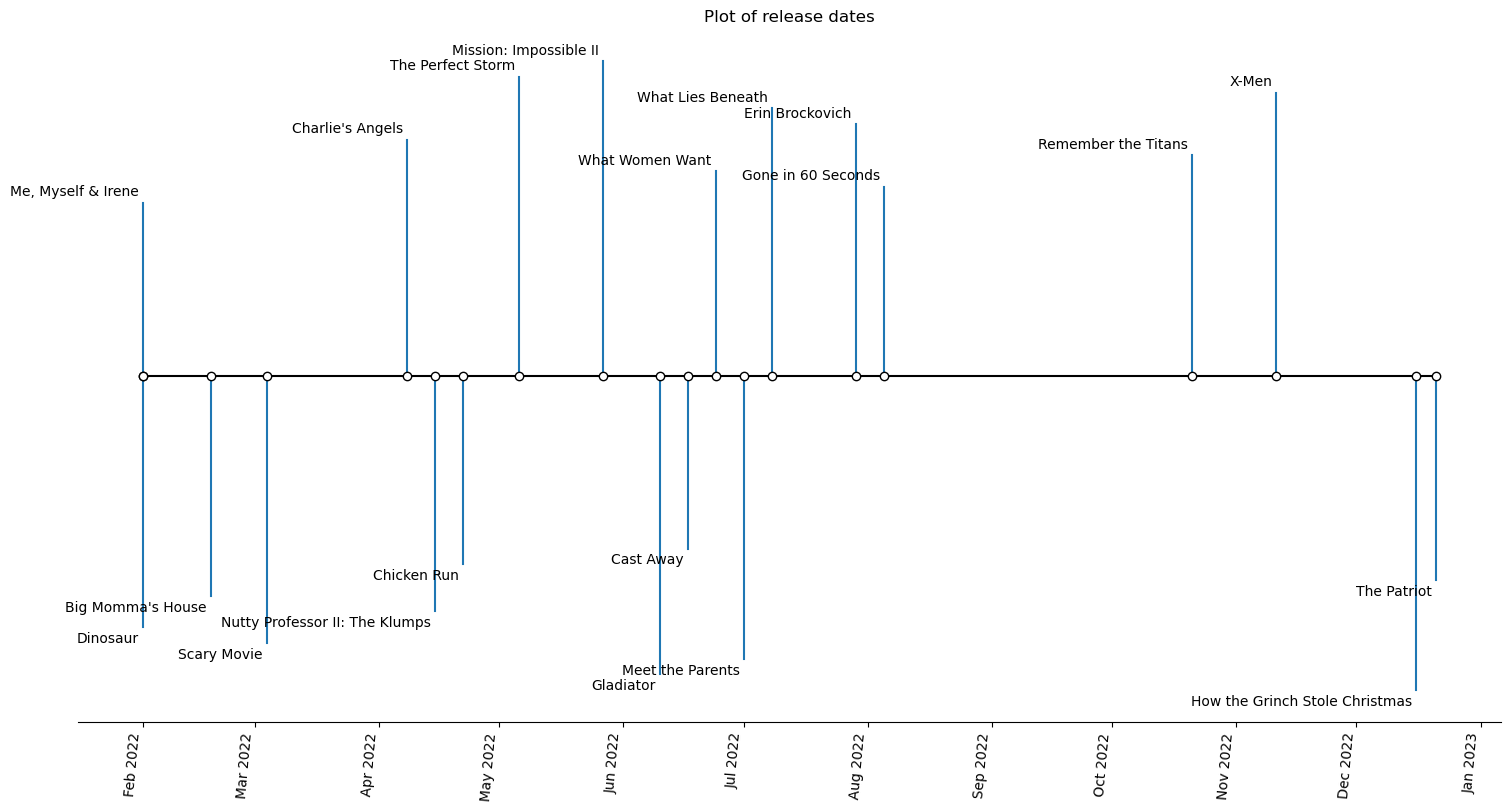

In [8]:
# Obtaining all the release dates for each movie
movie_release_dates = compute_stat(movies_of_2022_metadata, "Released", movies_of_2022)

# Parsing the movie dates
dates = []
for d in movie_release_dates:
    dates.append(parse(d))
    # Choose some nice levels for the height of the movie labels
levels = np.tile([-20, 20, -19, 19, -18, 18, -17, 17, -16, 16, -15, 15, -14, 14, -13, 13, -12, 12, -11, 11],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(15, 8), constrained_layout=True)
ax.set(title="Plot of release dates")

markerline, stemline, baseline = ax.stem(dates, levels,
                                        basefmt="k-",
                                         use_line_collection=False)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, movies_of_2000, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 1 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=85, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

plt.show()

It would seem that once again, no movie was released in the first month and a half of 2022. 

Looking at both of these graphs it would seem like most of the movies which make it to the top grossing were released in the first half of the year.

There isn't a hard and fast rule that top grossing movies are released in the first half of the year, but there are a few factors that can make it more likely. For one, the summer months (June-August) are traditionally a popular time for big blockbuster releases, as people have more free time and are looking for entertainment. 

However, there is also less competition in the early months of the year, and studios may release highly-anticipated films during this time in order to capitalize on the lack of competition and generate buzz. Additionally, some movies may be released earlier in the year to qualify for awards season, which typically takes place in the first few months of the year.

Next we will plot all the movie ratings. Here the word rating refers to the appropriate age or target audience for the movie and not a score which could have been given to a movie on a website.

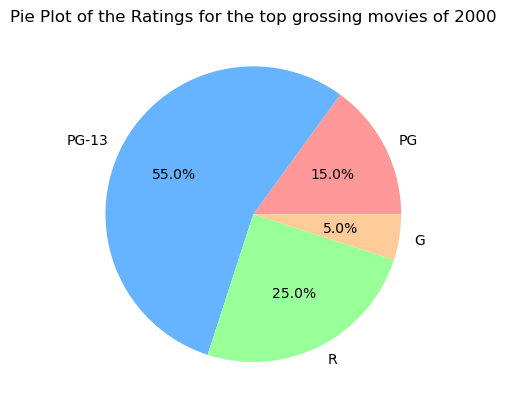

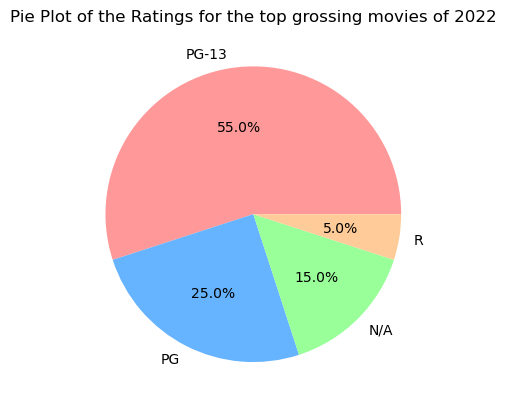

In [9]:
# Obtaining the ratings for each movie
movie_ratings = compute_stat(movies_of_2000_metadata, "Rated", movies_of_2000)
# Counting the number of instances of each rating 
count_elements= Counter(movie_ratings)
labels = list(map(str, count_elements.keys()))
number_of_ratings = list(map(int, count_elements.values()))

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plotting the data obtained
plt.pie(number_of_ratings, labels=labels, colors=colors, autopct='%1.1f%%')
#plt.legend(title = "Pie Plot of the Ratings for the top grossing movies of 2000")
plt.title("Pie Plot of the Ratings for the top grossing movies of 2000")
plt.show() 

movie_ratings = compute_stat(movies_of_2022_metadata, "Rated", movies_of_2022)
# Counting the number of instances of each rating 
count_elements= Counter(movie_ratings)
labels = list(map(str, count_elements.keys()))
number_of_ratings = list(map(int, count_elements.values()))

# Plotting the data obtained
plt.pie(number_of_ratings, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Pie Plot of the Ratings for the top grossing movies of 2022")
plt.show() 

From this, it is clear that there is some correlation between the rating of a movie and its performance. From both pie charts it is clear that PG-13 movies hold the majority of the spots when it comes to top grossing movies.

PG-13 movies are more likely to be in the top grossing movies because they generally have wider appeal and can be marketed to a broader audience, including both teenagers and adults. Additionally, PG-13 movies can include some mature content, such as violence and mild language, without being too explicit or offensive, which can further increase their appeal to a wider audience.

It is also noticed that an increase number of movies rated "PG" are in the top grossing in 2022 instead of 2000. One possible reason why there are more top grossing movies rated PG in the top grossing movies of 2022 than in the top grossing movies of 2000 is that the movie industry has become more family-friendly and has increasingly targeted a wider audience that includes children and families. Additionally, the rise of digital media and streaming services may have created more opportunities for family-friendly content to reach a larger audience.

Another important aspects of movies is the runtime. Having a runtime too long can be a big turnoff to audiences when viewing a movie. In this section we will be comparing two things. The first one is the difference in movie lengths for both sets of movies using bar charts, and afterwards, we will be creating a scatter plot to see if there is a visible correclation between the runtime of a movie and the box office revenue. 

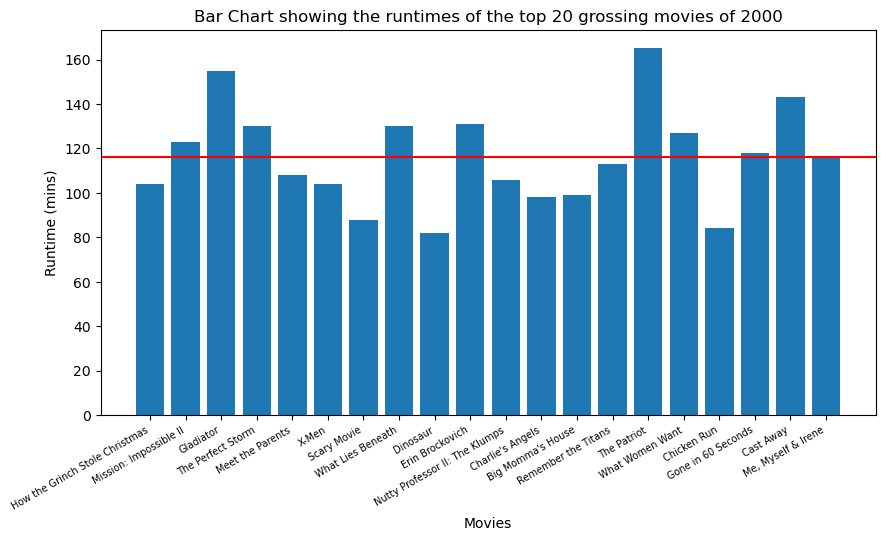

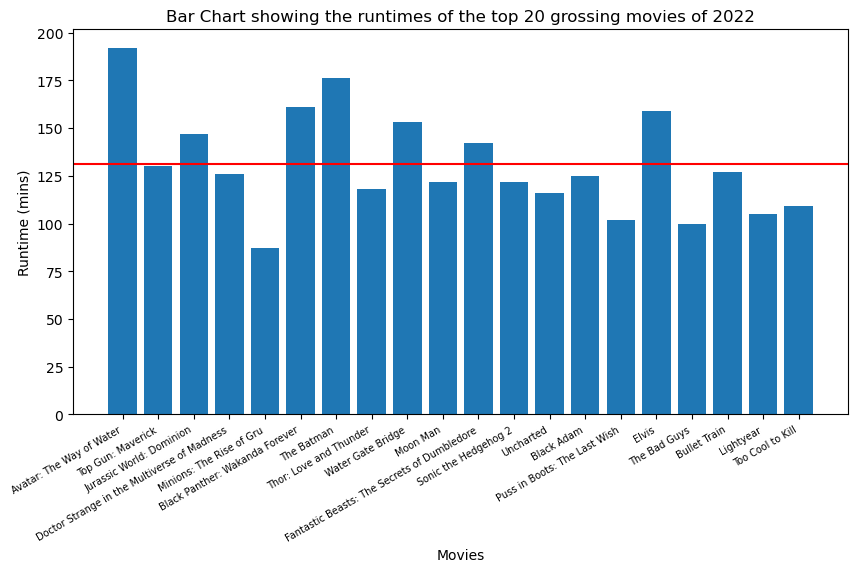

In [10]:
# Obtaining the runtime for each movie
movie_runtime = compute_stat(movies_of_2000_metadata, "Runtime", movies_of_2000)

# Extracting the time from the data in int instead of str
movie_runtime_int = []
for runtime in movie_runtime:
    movie_runtime_int.append(int(re.search(r'\d+', runtime).group()))

average_runtime = statistics.mean(movie_runtime_int)

fig = plt.figure(figsize = (10, 5))

matplotlib.pyplot.axhline(y=average_runtime, color = 'r')

# creating the bar plot
plt.bar(movies_of_2000, movie_runtime_int)
plt.xticks(fontsize=7, rotation=30, ha='right')
    
plt.xlabel("Movies")
plt.ylabel("Runtime (mins)")
plt.title("Bar Chart showing the runtimes of the top 20 grossing movies of 2000")
plt.show()

# Obtaining the runtime for each movie
movie_runtime = compute_stat(movies_of_2022_metadata, "Runtime", movies_of_2022)

# Extracting the time from the data in int instead of str
movie_runtime_int = []
for runtime in movie_runtime:
    movie_runtime_int.append(int(re.search(r'\d+', runtime).group()))

average_runtime = statistics.mean(movie_runtime_int)

fig = plt.figure(figsize = (10, 5))

matplotlib.pyplot.axhline(y=average_runtime, color = 'r')

# creating the bar plot
plt.bar(movies_of_2022, movie_runtime_int)
plt.xticks(fontsize=7, rotation=30, ha='right')
    
plt.xlabel("Movies")
plt.ylabel("Runtime (mins)")
plt.title("Bar Chart showing the runtimes of the top 20 grossing movies of 2022")
plt.show()

Although there are a couple of outliars, it is clear from these bar charts that there is a lot less variance when it comes to movie runtimes in 2022 compared to 2000. With a slightly increased average movie time in 2022 compared to 2000, it seems that movie creators have a much more clear understanding of their target audience and the runtime to maximise income. 

It must also be noted that in 2022, the target audience of the movie seems to have some level of correlation with the runtime. This is seen with movies for a younger audience such as 'Minions: The Rise of Gru', 'Puss in Boots: The Last Wish' and 'The Bad Guys', having a lower runtime for their younger audience. 

To view if there is a correlation between the runtime and the box office, a scatter plot will be shown below. To calculate the values of this, the metric used was the box office income per minute of screen play. i.e. box office divided by runtime.

Note, only the movies from 2000 are used as some of the movies from 2022 don't contain a Box Office value, possibly as they haven't been completely calculated.

There would also be factors to take in if we were to compare these two graphs as many aspects have changed in the 20 years, e.g. price of ticket etc.

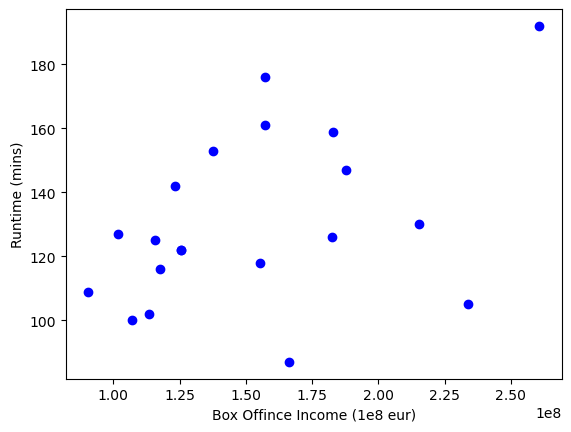

In [11]:
#Obtaining the box office value
box_office = compute_stat(movies_of_2000_metadata, "BoxOffice", movies_of_2000)

#Splitting data into int
box_office_per_min = []
for value in box_office:
    box_office_per_min.append(int(value.replace(",", "").replace("$", "")))

#Printing the data
plt.xlabel("Box Offince Income (1e8 eur)")
plt.ylabel("Runtime (mins)");
plt.plot(box_office_per_min, movie_runtime_int, 'o', color='blue')
plt.show()

From looking at the graph found above, the conclusion found is that there is a weak positive correlation between movie runtime and box office performance. This means that, on average, longer movies tend to earn slightly more money at the box office than shorter movies, but the relationship is not very strong. Other factors such as marketing, release date, and critical reception can also have a significant impact on a movie's box office performance.

There are a lot of outliars, where shorter movies had a very large box office, which helps us determine that the relationship between movie length and box office is very low.

'Movieng' onto genre, it is clear that each movie can reach multiple genres at the same time. To represent the number of times a movie touches this genre, pie charts will be used to illustrate the number of times a genre is used by a movie.

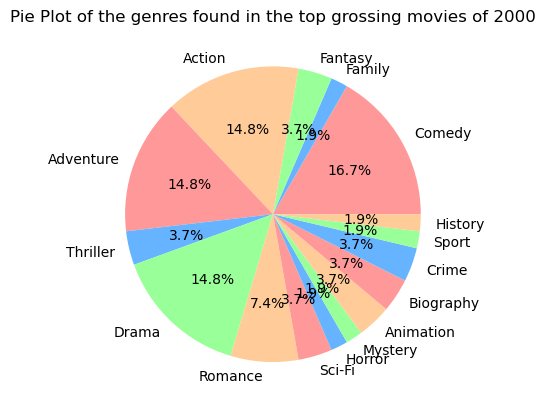

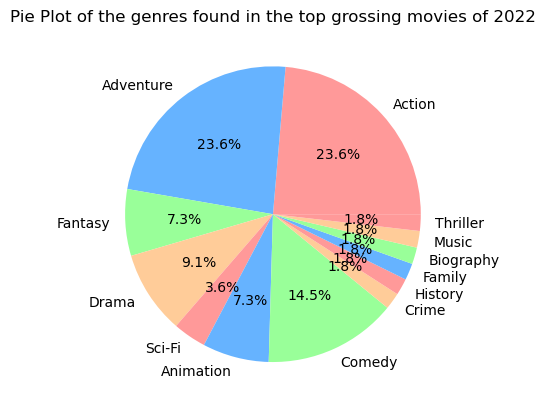

In [12]:
#Obtaining the movie genre
movie_genre = compute_stat(movies_of_2000_metadata, "Genre", movies_of_2000)

#Splitting up the genres as there are multiple per movie
joined_list = []
for element in movie_genre:
    split_string = element.split(",")
    for i in range(len(split_string)):
        joined_list.append(split_string[i].strip())
        
# Counting the number of instances of each rating 
count_elements= Counter(joined_list)
labels = list(map(str, count_elements.keys()))
number_of_ratings = list(map(int, count_elements.values()))

# add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plotting the data obtained
plt.pie(number_of_ratings, labels=labels, colors=colors, autopct='%1.1f%%')
#plt.legend(title = "Pie Plot of the Ratings for the top grossing movies of 2000")
plt.title("Pie Plot of the genres found in the top grossing movies of 2000")
plt.show() 

movie_genre = compute_stat(movies_of_2022_metadata, "Genre", movies_of_2022)

joined_list = []
for element in movie_genre:
    split_string = element.split(",")
    for i in range(len(split_string)):
        joined_list.append(split_string[i].strip())
        
# # Counting the number of instances of each rating 
count_elements= Counter(joined_list)
labels = list(map(str, count_elements.keys()))
number_of_ratings = list(map(int, count_elements.values()))

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Plotting the data obtained
plt.pie(number_of_ratings, labels=labels, colors=colors, autopct='%1.1f%%')
#plt.legend(title = "Pie Plot of the Ratings for the top grossing movies of 2022")
plt.title("Pie Plot of the genres found in the top grossing movies of 2022")
plt.show() 

Through these pie charts, there is a clear trend that the best grossing movies mostly touch the genres of Adventure, Action, Comedy and Drama, with a clear emphesis on Adventure and Action in 2022 compares to 2000. 

From the pie chart it is also clear that each movie is much more aimed at a target audience as the mode neiche genres such as music, thriler, biography, family, history and crime all contain matching popularity, a stat not seen in 2000, as these genres were more widespread.

Although there are no set reasons for the decrease in popularity with the genre of drama for making movies enter the top 20 box office of the year, one reason may be the changing preferences and demographics of movie-goers. Younger audiences tend to be more drawn to action, adventure, and superhero films, which have become increasingly popular in recent years. Additionally, the rise of streaming platforms has created more opportunities for viewers to watch drama series and films from the comfort of their homes, which may have impacted the demand for theatrical releases.

Another factor may be the increasing competition in the entertainment industry. With the rise of social media and the proliferation of new media platforms, consumers have more options than ever before to consume content. As a result, studios may be focusing more on producing movies that have broad appeal and can attract larger audiences. 

Ultimately, the reasons for the decline in popularity of the drama genre in recent years are likely complex and multifaceted.

#### Language

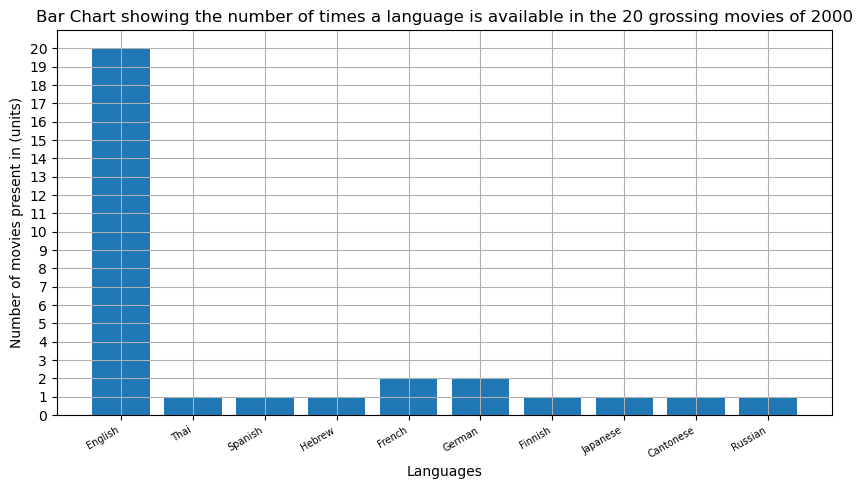

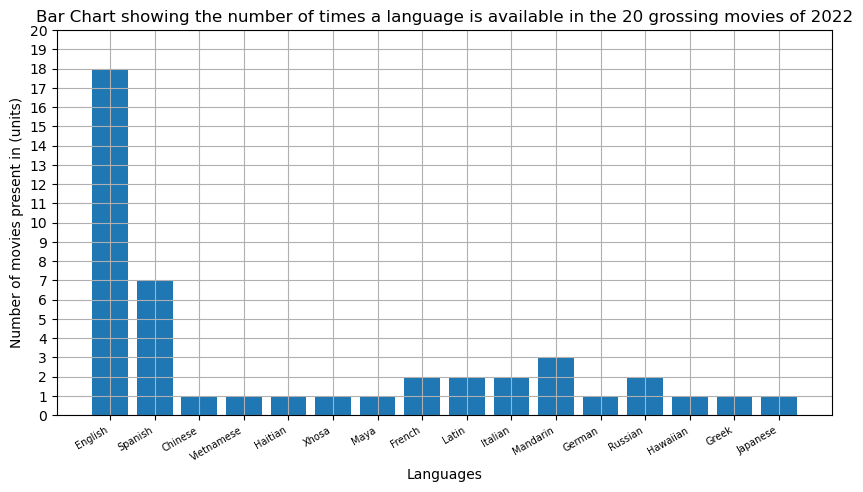

In [13]:
#Obtaining movie language data
movie_language = compute_stat(movies_of_2000_metadata, "Language", movies_of_2000)

#Once again splitting languages as there are multiple per movies
joined_list = []
for element in movie_language:
    split_string = element.split(",")
    for i in range(len(split_string)):
        joined_list.append(split_string[i].strip())
        
# # Counting the number of instances of each rating 
count_elements= Counter(joined_list)
labels = list(map(str, count_elements.keys()))
number_of_ratings = list(map(int, count_elements.values()))

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, number_of_ratings)
plt.xticks(fontsize=7, rotation=30, ha='right')
plt.grid()
plt.xlabel("Languages")
plt.yticks(np.arange(0, 21, 1))
plt.ylabel("Number of movies present in (units)")
plt.title("Bar Chart showing the number of times a language is available in the 20 grossing movies of 2000")
plt.show()

movie_language = compute_stat(movies_of_2022_metadata, "Language", movies_of_2022)

joined_list = []
for element in movie_language:
    split_string = element.split(",")
    for i in range(len(split_string)):
        joined_list.append(split_string[i].strip())
        
# # Counting the number of instances of each rating 
count_elements= Counter(joined_list)
labels = list(map(str, count_elements.keys()))
number_of_ratings = list(map(int, count_elements.values()))

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, number_of_ratings)
plt.xticks(fontsize=7, rotation=30, ha='right')
plt.yticks(np.arange(0, 21, 1))
plt.grid()
plt.xlabel("Languages")
plt.ylabel("Number of movies present in (units)")
plt.title("Bar Chart showing the number of times a language is available in the 20 grossing movies of 2022")
plt.show()

Seeing these graphs, there is a clear demographic towards english speaking viewers. For both years, english was the principle langauge of the movies, with every movie being in english in 2000. One clear difference between the two years is the number of langauges available to each movie. For 2022, there are clearly more researces with technology and a higher populartion for translation. This allows movies to be translated into more languages. 

This can be reflected in the bar chart above with a much wider range of langauges available in 2022 compares to 2000. This could also be due to movie creaters trying to reach a maximum number of viewers without hindering profits. This is to say, to have a budget to translate a movie to another language to widen the available audience, however, not spend unnecessary money to translate a movie into another language if the viewer base is very small and would increase the revenue neglectfully, or even harm it.

There is a clear change in the number of movies being translated to Spanish over the years. This is not surprising as Spanish is the second most spoken language in the world. Therefore, translating a movie to Spanish would greatly increase the viewer base.

#### Country

Next, we will compare the location the movie is set to see if this may have an impact on the top grossing movies of both 2000, and 2022.

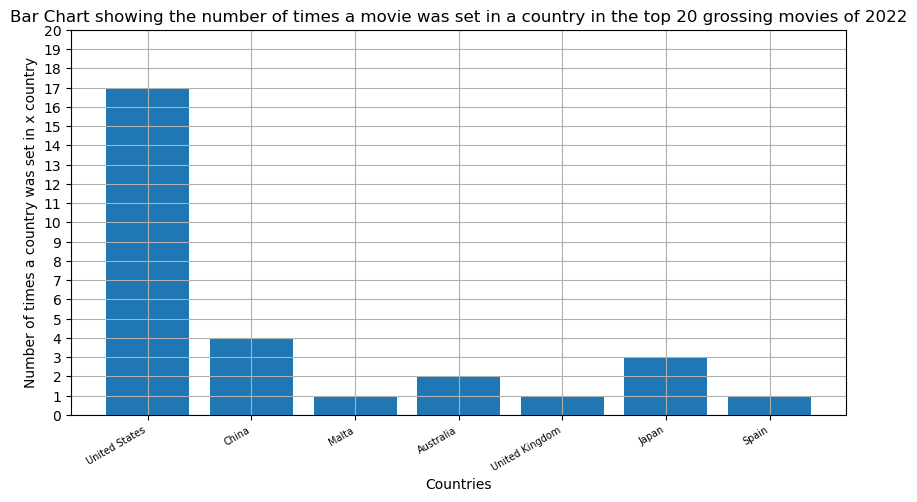

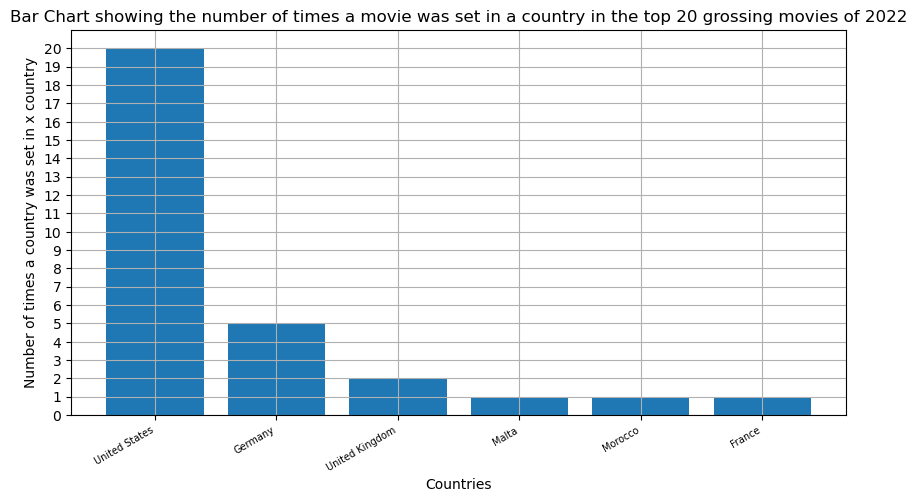

In [14]:
#Obtaining movie country
movie_country = compute_stat(movies_of_2022_metadata, "Country", movies_of_2022)

#Splitting countries per movie
joined_list = []
for country in movie_country:
    split_string = country.split(",")
    for i in range(len(split_string)):
        joined_list.append(split_string[i].strip())
        
# Counting the number of instances of each rating 
count_elements= Counter(joined_list)
labels = list(map(str, count_elements.keys()))
number_of_countries = list(map(int, count_elements.values()))

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, number_of_countries)
plt.xticks(fontsize=7, rotation=30, ha='right')
plt.grid()
plt.xlabel("Countries")
plt.yticks(np.arange(0, 21, 1))
plt.ylabel("Number of times a country was set in x country")
plt.title("Bar Chart showing the number of times a movie was set in a country in the top 20 grossing movies of 2022")
plt.show()

movie_country = compute_stat(movies_of_2000_metadata, "Country", movies_of_2000)

joined_list = []
for country in movie_country:
    split_string = country.split(",")
    for i in range(len(split_string)):
        joined_list.append(split_string[i].strip())
        
# Counting the number of instances of each rating 
count_elements= Counter(joined_list)
labels = list(map(str, count_elements.keys()))
number_of_countries = list(map(int, count_elements.values()))

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, number_of_countries)
plt.xticks(fontsize=7, rotation=30, ha='right')
plt.grid()
plt.xlabel("Countries")
plt.yticks(np.arange(0, 21, 1))
plt.ylabel("Number of times a country was set in x country")
plt.title("Bar Chart showing the number of times a movie was set in a country in the top 20 grossing movies of 2022")
plt.show()

As can be seen from both charts, although there are no clear trends, it is clear that most movies are set in, mostly, first world countries. This is clearly as this is the largest target audience, as these are the people which will have the most movie available to view the movie. Therefore, making the movie more relatable is a clear goal in setting a movie.

The one trend which can be seen is that most of the time, the movie is partly set in America. There are several reasons why many of the highest-grossing movies are set in America:

Market size: The United States is the largest film market in the world, with a population of over 330 million people. Hollywood studios often create movies that are tailored to American audiences, and these movies tend to perform well domestically, which can lead to high grosses.

Cultural influence: American culture has a significant influence on global popular culture, including movies. Many of the most successful films showcase elements of American culture, such as the American dream, American values, or American landmarks.

Production infrastructure: Hollywood is the center of the global film industry, and American film studios have a well-established infrastructure for producing and distributing films. This infrastructure includes state-of-the-art studios, equipment, and skilled professionals, which can contribute to the success of American-made movies.

English language: English is the dominant language of the global film industry, and most American movies are produced in English. This means that American movies can easily be distributed and marketed to English-speaking audiences around the world, which can contribute to their high grosses.

Overall, the combination of market size, cultural influence, production infrastructure, and English language dominance helps to explain why many of the highest-grossing movies are set in America. However, it's worth noting that there are also many successful movies that are set in other countries or that feature non-American cultures and themes.

# Awards

It is clear that as a result of these high grossing movies, they are bound to win a certain number of awards. Using the data obtained from task 1 we will explore this to see if there is any correlation between the box office and number of awards a movie has obtained.

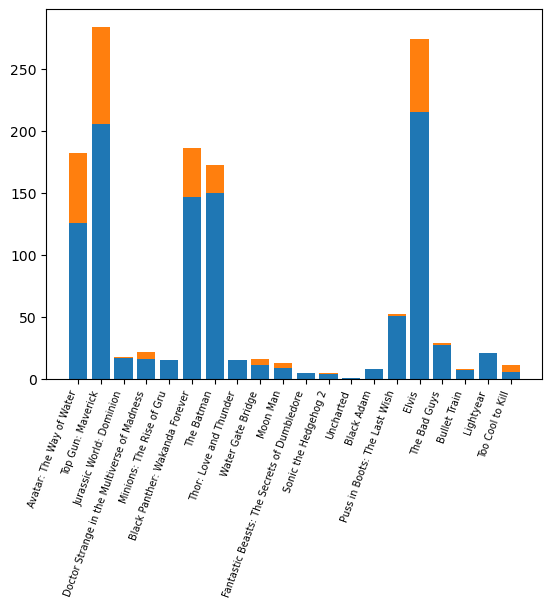

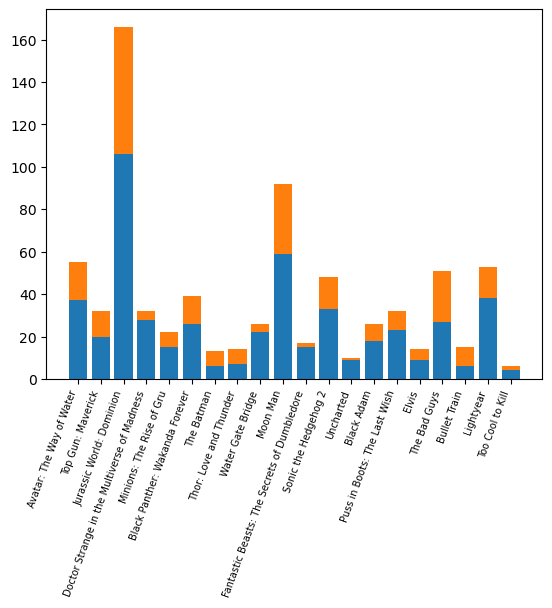

In [15]:
awards = compute_stat(movies_of_2022_metadata, "Awards", movies_of_2022)
awards_filtered = []

for entry in awards:
    if "." in entry:
        split_entry = entry.split(".")
        awards_filtered.append(split_entry[-1].strip())
    elif "BAFTA" in entry:
        split_entry = entry.split("BAFTA")
        awards_filtered.append(split_entry[-1].strip())
    else:
        awards_filtered.append(entry.strip())

wins = []
nominations = []
for elements in awards_filtered:
    if "&" in elements:
        split_elements = elements.split("&")
        wins.append(split_elements[0].strip())
        nominations.append(split_elements[1].strip())
    else:
        if "wins" in elements:
            wins.append(elements.strip())
            nominations.append("0")
        elif "nomination" in elements:
            nominations.append(elements.strip())
            wins.append("0")

wins_in_int = []
nominations_in_int = []
for win in wins:
    wins_in_int.append(int(re.search(r'\d+', win).group()))
for nomination in nominations:
    nominations_in_int.append(int(re.search(r'\d+', nomination).group()))

plt.xticks(fontsize=7, rotation=70, ha='right')
plt.bar(movies_of_2022, nominations_in_int)
plt.bar(movies_of_2022, wins_in_int, bottom=nominations_in_int)
plt.show()

awards = compute_stat(movies_of_2000_metadata, "Awards", movies_of_2000)
awards_filtered = []

for entry in awards:
    if "." in entry:
        split_entry = entry.split(".")
        awards_filtered.append(split_entry[-1].strip())
    elif "BAFTA" in entry:
        split_entry = entry.split("BAFTA")
        awards_filtered.append(split_entry[-1].strip())
    else:
        awards_filtered.append(entry.strip())

wins = []
nominations = []
for elements in awards_filtered:
    if "&" in elements:
        split_elements = elements.split("&")
        wins.append(split_elements[0].strip())
        nominations.append(split_elements[1].strip())
    else:
        if "wins" in elements:
            wins.append(elements.strip())
            nominations.append("0")
        elif "nomination" in elements:
            nominations.append(elements.strip())
            wins.append("0")

wins_in_int = []
nominations_in_int = []
for win in wins:
    wins_in_int.append(int(re.search(r'\d+', win).group()))
for nomination in nominations:
    nominations_in_int.append(int(re.search(r'\d+', nomination).group()))

plt.xticks(fontsize=7, rotation=70, ha='right')
plt.bar(movies_of_2022, nominations_in_int)
plt.bar(movies_of_2022, wins_in_int, bottom=nominations_in_int)
plt.show()

Although there doesn't seem to be a corrilation between the awards won and the box office, it is clear that the higher the box office, the more likely a movie is to win more awards. This being said, it is clear that if a movie is lower down the list of box office, it would not stop it from obtaining awards. 

The only corrilation visible from this bar chart is that the more nominations a a movie has (as seen in blue) the more wins it has, as expected.

# Ratings

Finally, we will explore the ratings of the top 20 grossing movies and see if there are any correlations with their respective box office.


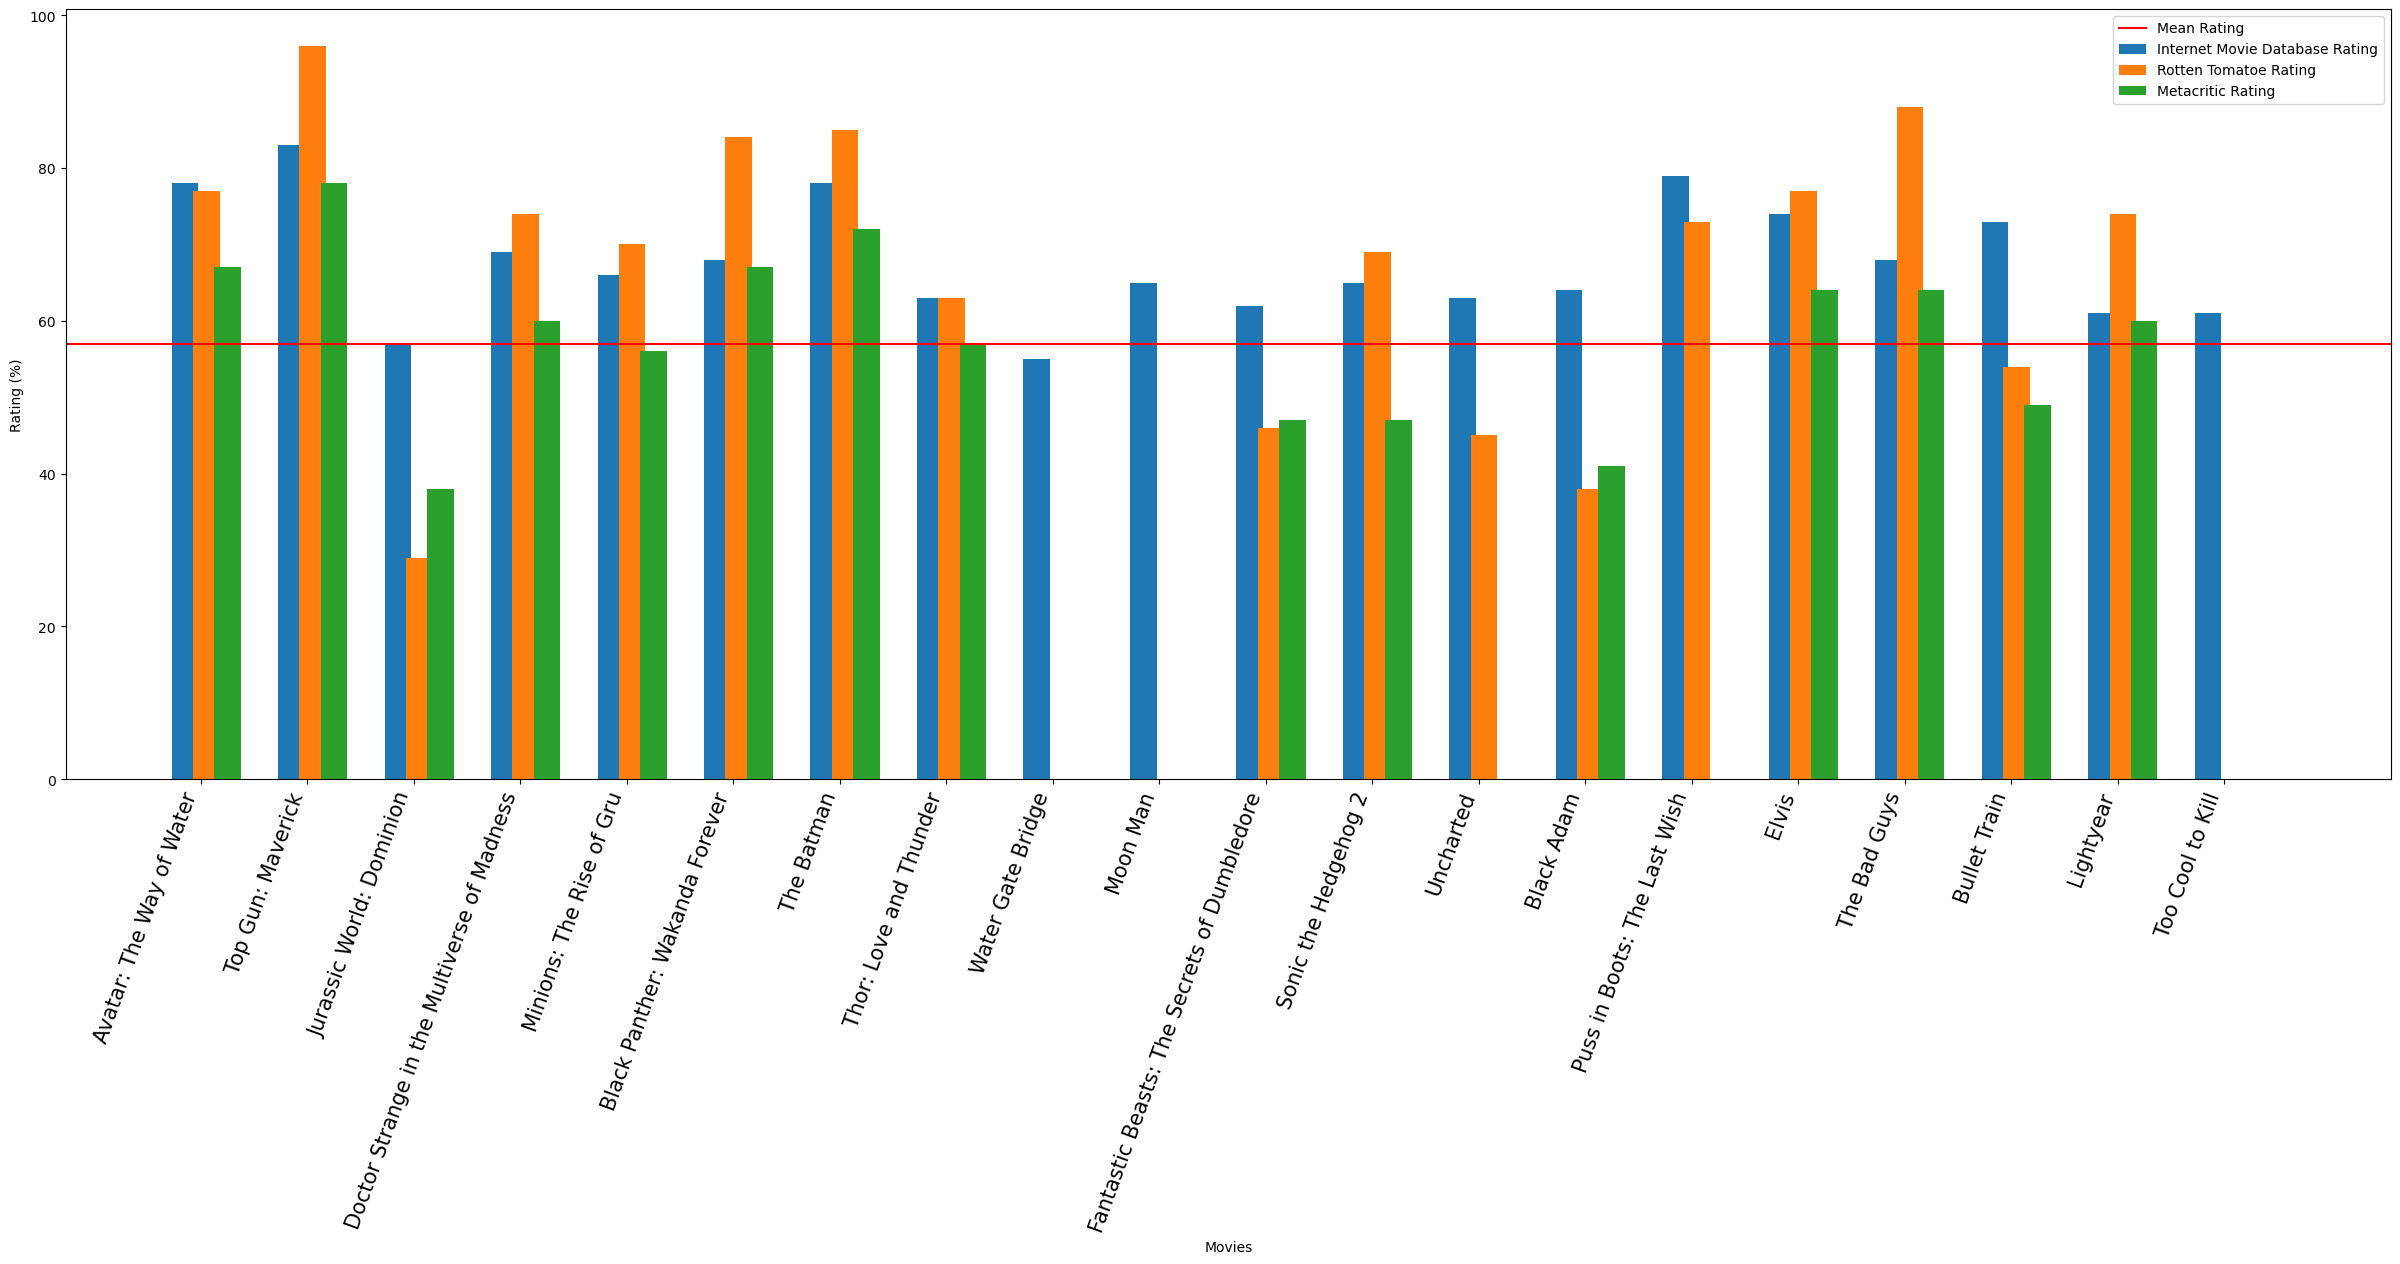

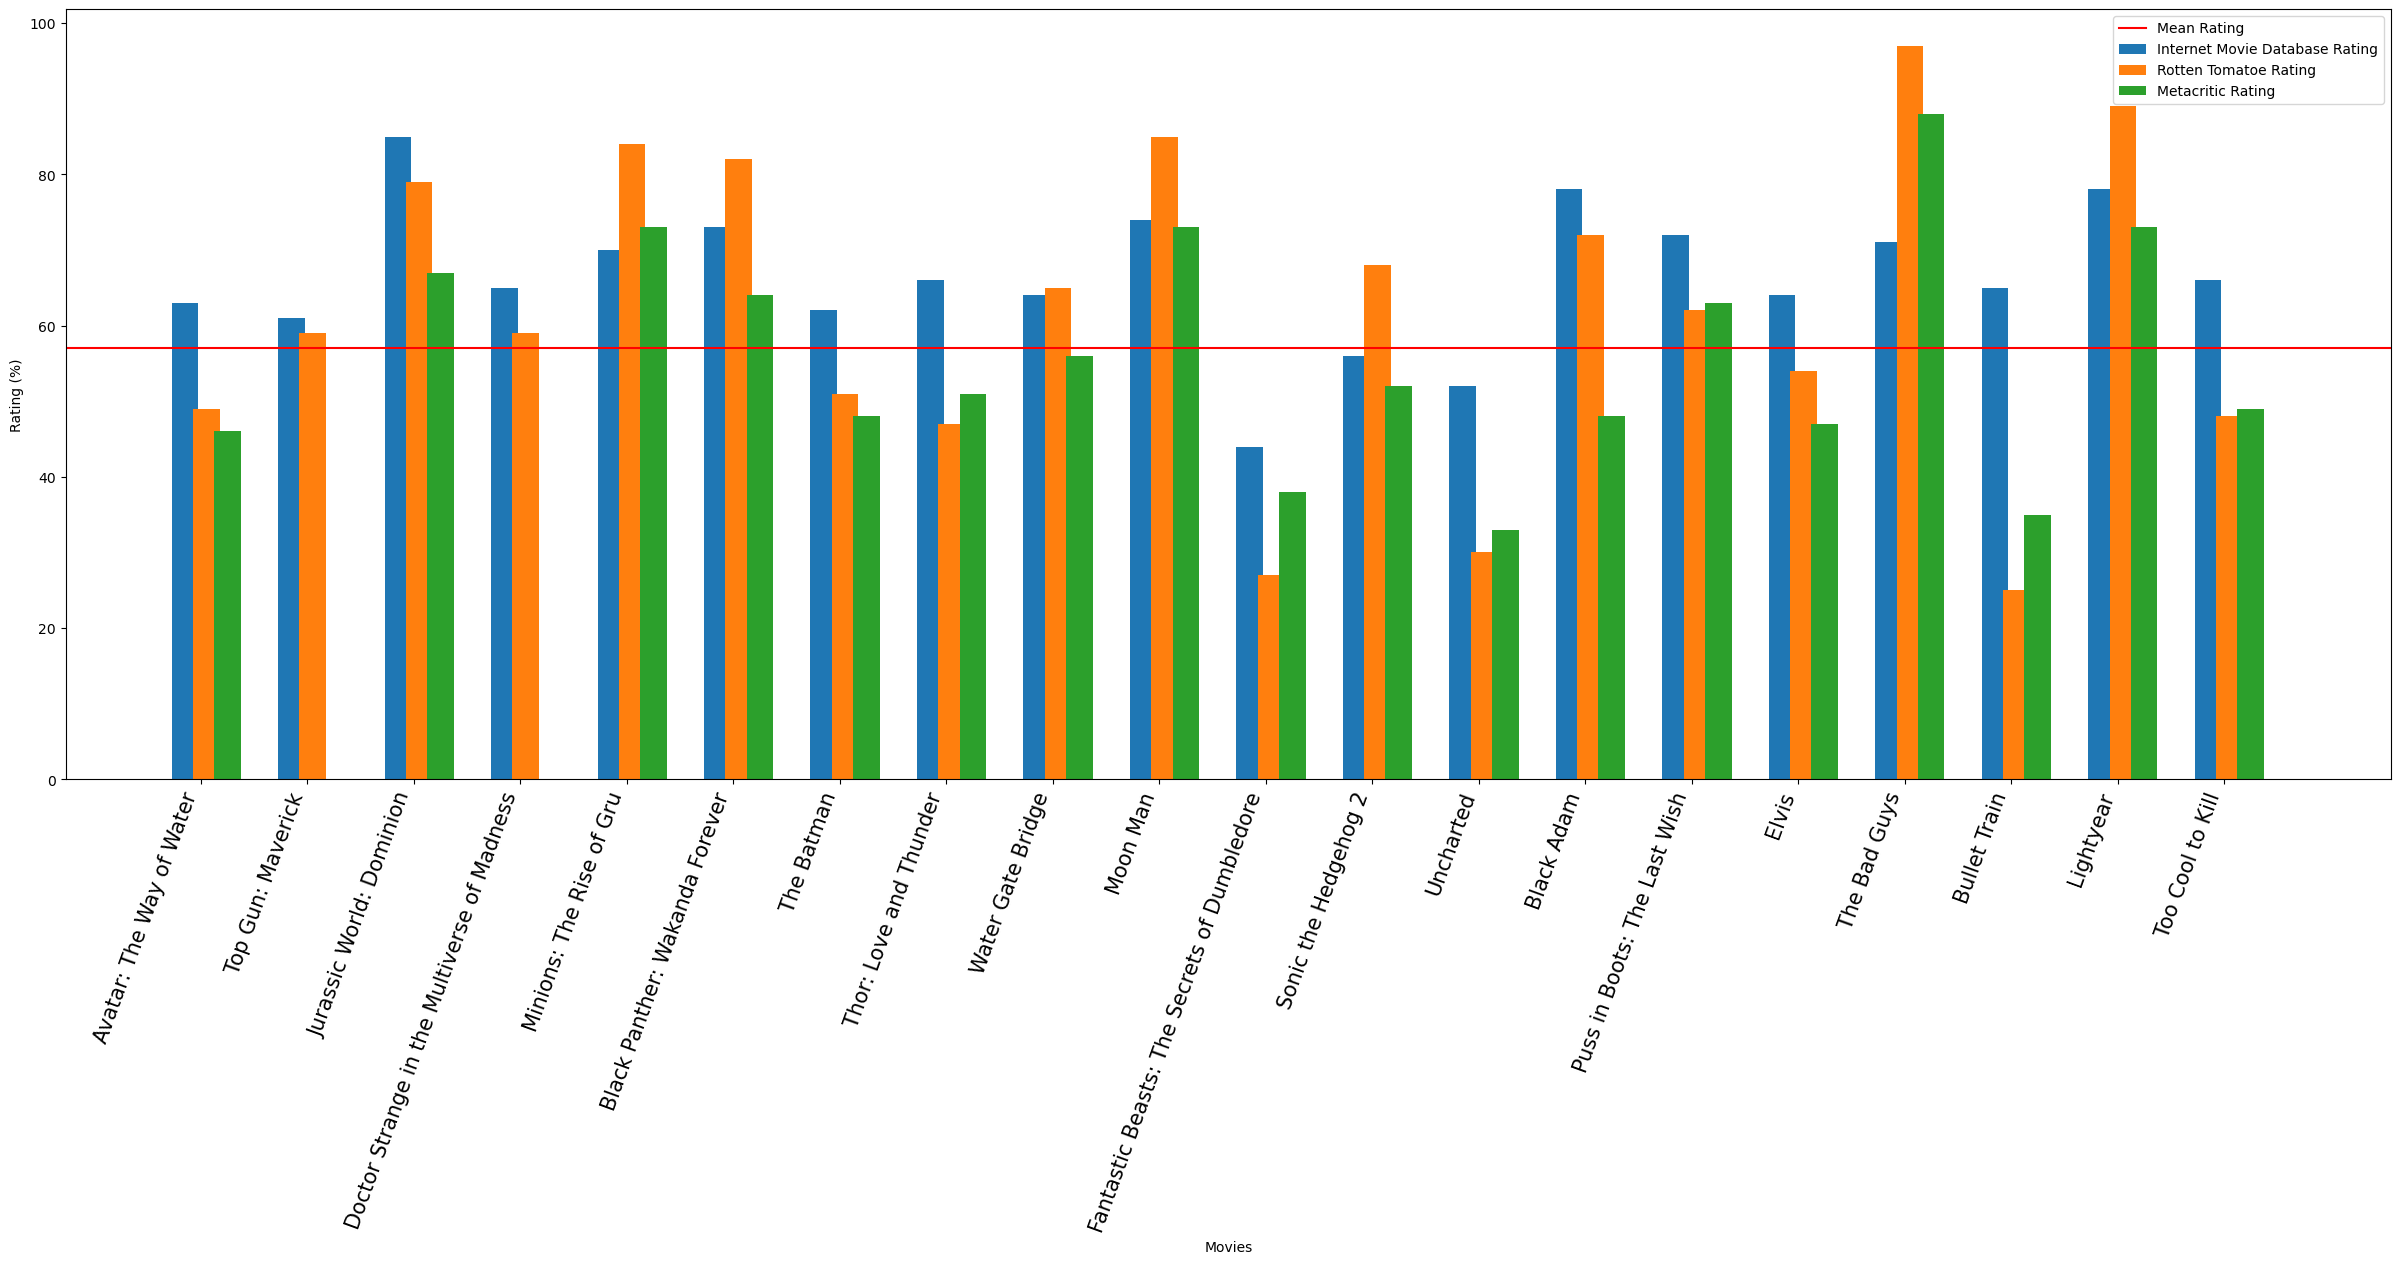

In [23]:
ratings = compute_stat(movies_of_2022_metadata, "Ratings", movies_of_2022)

labels = ["Mean Rating", "Internet Movie Database Rating","Rotten Tomatoe Rating","Metacritic Rating"]
Internet_Movie_Database = []
Rotten_Tomatoe = []
Metacritic = []
for movie_rating in ratings:
    try:
         Internet_Movie_Database.append(movie_rating[0]["Value"].split("/")[0])
    except IndexError:
        Internet_Movie_Database.append(0)
    try:
         Rotten_Tomatoe.append(float(re.search(r'\d+', movie_rating[1]["Value"].split("%")[0].split("/")[0]).group()))
    except IndexError:
        Rotten_Tomatoe.append(0)
    try:
         Metacritic.append(float(re.search(r'\d+', movie_rating[2]["Value"].split("/")[0]).group()))
    except IndexError:
         Metacritic.append(0)
Internet_Movie_Database_int = list(map(lambda elem: 10*float(elem.split()[0]), Internet_Movie_Database))

x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
mean = math.ceil((sum(Internet_Movie_Database_int + Rotten_Tomatoe + Metacritic))/60)

matplotlib.pyplot.axhline(y=mean, color = 'r')

x_tick_lotation = np.array([1.35,2.35,3.35,4.35,5.35,6.35,7.35,8.35,9.35,10.35,11.35,12.35,13.35,14.35,15.35,16.35,17.35,18.35,19.35,20.35])
plt.rcParams["figure.figsize"] = (30,10)
plt.bar(x+0.2, Internet_Movie_Database_int, width=0.25)
plt.bar(x+0.4, Rotten_Tomatoe, width=0.25)
plt.bar(x+0.6, Metacritic, width=0.25)
plt.bar(x+0.8, 0, width=0.25)
plt.xticks(x_tick_lotation, movies_of_2022, rotation ='vertical')
plt.xticks(fontsize=15, rotation=70, ha='right')
plt.ylabel("Rating (%)")
plt.xlabel("Movies")
plt.legend(labels)
plt.show()

ratings = compute_stat(movies_of_2000_metadata, "Ratings", movies_of_2000)

Internet_Movie_Database = []
Rotten_Tomatoe = []
Metacritic = []
for movie_rating in ratings:
    try:
         Internet_Movie_Database.append(movie_rating[0]["Value"].split("/")[0])
    except IndexError:
        Internet_Movie_Database.append(0)
    try:
         Rotten_Tomatoe.append(float(re.search(r'\d+', movie_rating[1]["Value"].split("%")[0].split("/")[0]).group()))
    except IndexError:
        Rotten_Tomatoe.append(0)
    try:
         Metacritic.append(float(re.search(r'\d+', movie_rating[2]["Value"].split("/")[0]).group()))
    except IndexError:
         Metacritic.append(0)
Internet_Movie_Database_int = list(map(lambda elem: 10*float(elem.split()[0]), Internet_Movie_Database))
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

matplotlib.pyplot.axhline(y=mean, color = 'r')

x_tick_lotation = np.array([1.35,2.35,3.35,4.35,5.35,6.35,7.35,8.35,9.35,10.35,11.35,12.35,13.35,14.35,15.35,16.35,17.35,18.35,19.35,20.35])
plt.rcParams["figure.figsize"] = (30,10)
plt.bar(x+0.2, Internet_Movie_Database_int, width=0.25)
plt.bar(x+0.4, Rotten_Tomatoe, width=0.25)
plt.bar(x+0.6, Metacritic, width=0.25)
plt.bar(x+0.8, 0, width=0.25)
plt.xticks(x_tick_lotation, movies_of_2022, rotation ='vertical')
plt.xticks(fontsize=15, rotation=70, ha='right')
plt.ylabel("Rating (%)")
plt.xlabel("Movies")
plt.legend(labels)
plt.show()

It is quite self explaining that most grossing movies will have a higher than average movie rating, and the mean is a representation of all the movies accross all three websites available using this database. We can see from the graph that most movies are above 60% rating on at least website and that certain outliars really drag down the mean ratings.

It is clear that is a movie is in the top 20 grossing of its year, most likely than not it will be a movie appreciated by the audience.

It is also not told whether the movie ratings available in this database are an audience rating or an 'expert' ratings such as a 'TOMATOMETER' on rotten tomatoes, which as everyone knows are deeply unreliable. 

# Rest of info

There is more data available to us however, most of this is data isn't comparable, such as actors, movie director or poster, eventhough it is evident that they will have impact on how a movie does. 

If a movie has more famous actors or a creative director it will clearly impact the movie on release as it will have more promotion. 

Other factors which might affect whether a movie enters a top 20 grossing movie list are factors such as the movie budget and poster, which could be more appealing and insite viewers to view it.


By entering the name of one of the movies below, the rest of the information which isn't comparable on a plot or scale is given:

In [22]:
#Printing both movie lists
concatinated_movies = movies_of_2000 + movies_of_2022
for movie in concatinated_movies:
    print(movie)

How the Grinch Stole Christmas
Mission: Impossible II
Gladiator
The Perfect Storm
Meet the Parents
X-Men
Scary Movie
What Lies Beneath
Dinosaur
Erin Brockovich
Nutty Professor II: The Klumps
Charlie's Angels
Big Momma's House
Remember the Titans
The Patriot
What Women Want
Chicken Run
Gone in 60 Seconds
Cast Away
Me, Myself & Irene
Avatar: The Way of Water
Top Gun: Maverick
Jurassic World: Dominion
Doctor Strange in the Multiverse of Madness
Minions: The Rise of Gru
Black Panther: Wakanda Forever
The Batman
Thor: Love and Thunder
Water Gate Bridge
Moon Man
Fantastic Beasts: The Secrets of Dumbledore
Sonic the Hedgehog 2
Uncharted
Black Adam
Puss in Boots: The Last Wish
Elvis
The Bad Guys
Bullet Train
Lightyear
Too Cool to Kill


40

Enter movie title (cap sensitive):Elvis


Director,['Baz Luhrmann']
Writer,"['Baz Luhrmann, Sam Bromell, Craig Pearce']"
Actors,"['Tom Hanks, Austin Butler, Olivia DeJonge']"
Plot,"['The life of American music icon Elvis Presley, from his childhood to becoming a rock and movie star in the 1950s while maintaining a complex relationship with his manager, Colonel Tom Parker.']"


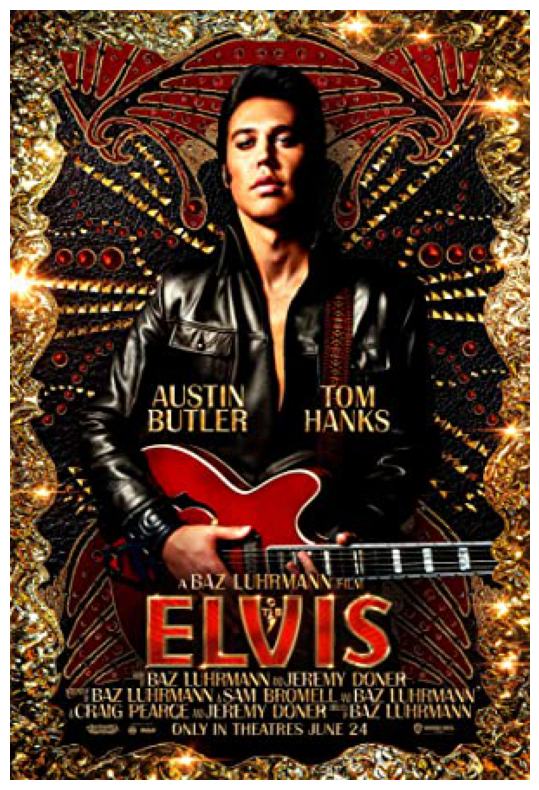

In [17]:
concatinated_data = movies_of_2000_metadata
concatinated_data.update(movies_of_2022_metadata)
movie_title = input('Enter movie title (cap sensitive), from the movies shown above:')
concatinated_movies
is_in_list = True
if movie_title in concatinated_movies:
    Director = compute_stat(concatinated_data, "Director", movie_title)
    Writer = compute_stat(concatinated_data, "Writer", movie_title)
    Actors = compute_stat(concatinated_data, "Actors", movie_title)
    Plot = compute_stat(concatinated_data, "Plot", movie_title)
    Poster = compute_stat(concatinated_data, "Poster", movie_title)
    data = [["Director", Director],
       ["Writer",Writer],
       ["Actors",Actors],
       ["Plot",Plot]]
    display_table(data)
    display_poster(Poster[0])


## Conclusion

Overall, there weren't any problems collecting the data from the api requests. This is likely since these are all very famous movies with lots of data known about them therefore, it is unlikely that there will be missing much data. If a new movie were to gain the spot of another one in the 20 top grossing movies, the process for collecting the data would remain unaffected. Similarly, the data collection system could easily be implemented for any other years by simply changing the list of 20 movies.

By analysing the data obtained from task 1, we were able to see the changes in features between the top 20 grossing movies from 2000 and the top 20 grossing movies from 2022. Some of the key differences found are: a change in genre with newer movies getting more GP-13 and GP rated, most likely due to an aim to reach a wider audience, thanks to the rise of digital media and streaming services may have created more opportunities for family-friendly content to reach a larger audience.

It was then observed that the runtime of a movie had before more specific to the target audience, with movies in 2022 having a much more fixed runtime, unless for a younger audience, in which the movie would be shorter than the ones for a more mature audience. There was a lot less variation for the movie runtime in 2022 than in 2000. This is most likely as an idea watch time for viewers was found, which could retain the audience's attention without having the movie so long that it could bore the audience. 

With the rise of social media and other fast-moving apps, it is well known that the average attention span is much shorter nowadays and that we are much more attracted to fast speeding scenes and movies. It was therefore, not shocking when inspecting the genres that the "action" and "adventure" movies had greatly risen in popularity from 2000 to 2022.

Once again in an attempt to reach a wider audience, it was also noted that the movies released in 2022 had a wider range of languages than in 2000. This is also likely due to technology being more advanced and movies being able to be translated more easily. 

Finally, the awards and ratings were observed, and although it wouldn't affect the views and sales of a movie at first, if a movie had more awards and greater reviews on movie review websites, someone would be more likely to watch it than a movie with lower ratings and less awards.

Some ideas for future analysis which could be performed on the data later on could be as stated at the end of the assignment, not enough data is given about the actors, directors and movie posters. As such, more data could be collected from other sources which could give a higher level of insight as to the increase in sales a movie would have depending on the popularity of an actor or actress. 

It would also be interesting to note the difference in sales a movie would obtain, purely based on an advertising factor, i.e. budget, poster, trailer, etc. However, I suspect obtaining the data purely on this would be very difficult as there are so many other factors which could affect how well a movie does.
